no1
run time = 0.006644010543823242
train loss: 100.84578882298419
valid loss: 80.75309888139465


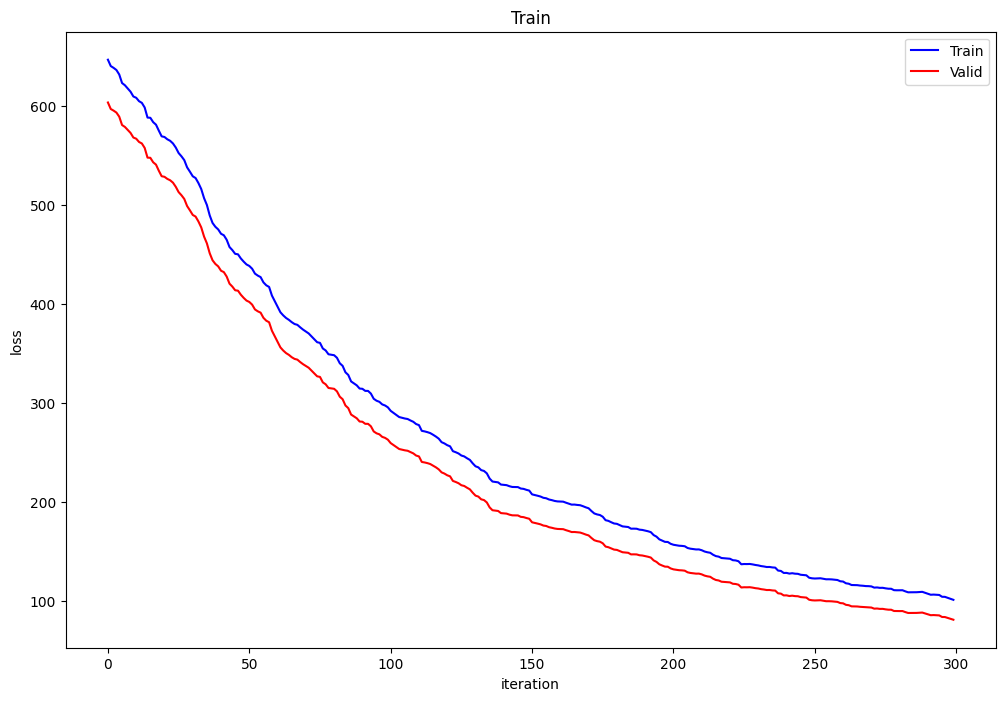

no2
run time = 0.004923820495605469
train loss: 21.488949930773657
valid loss: 22.956587260401147


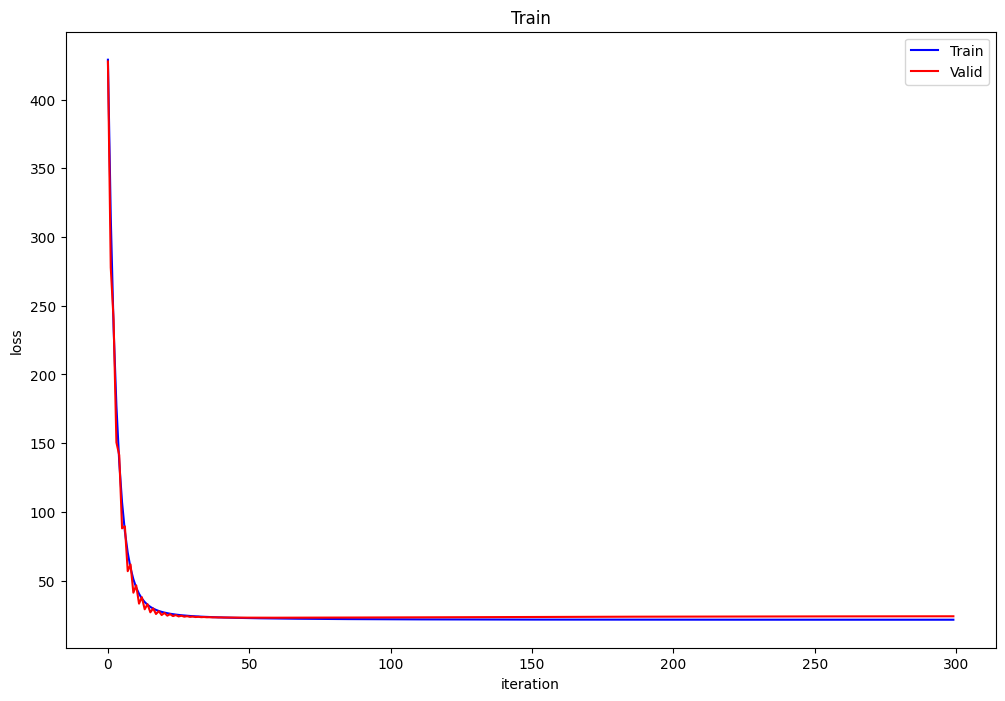

no3
run time = 0.005347728729248047
train loss: 23.584012013880013
valid loss: 23.09428937194694


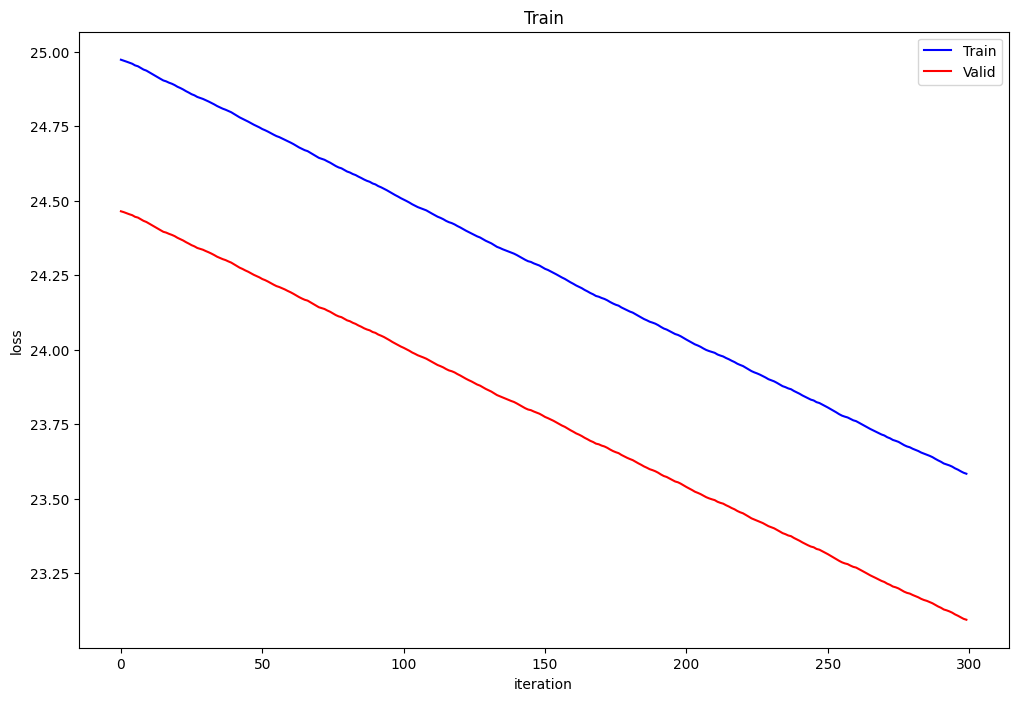

no4
run time = 0.0036249160766601562
train loss: 3.1859138849252924
valid loss: 3.236813131455396


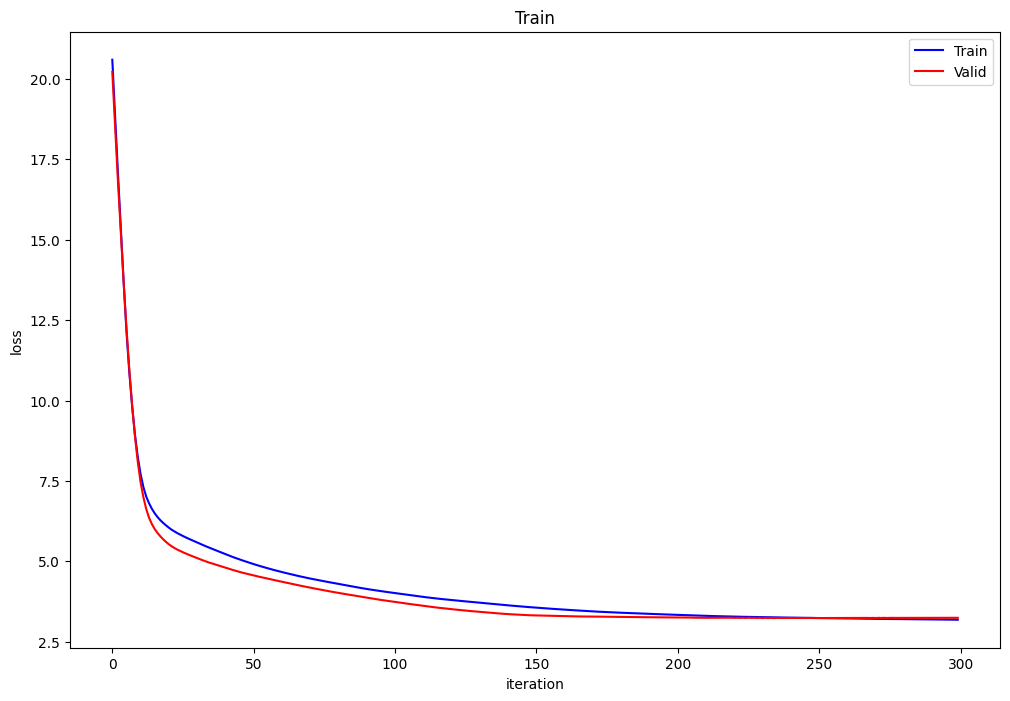

no5
run time = 0.006525993347167969
train loss: 3.1014122331366694
valid loss: 3.2387443723357565


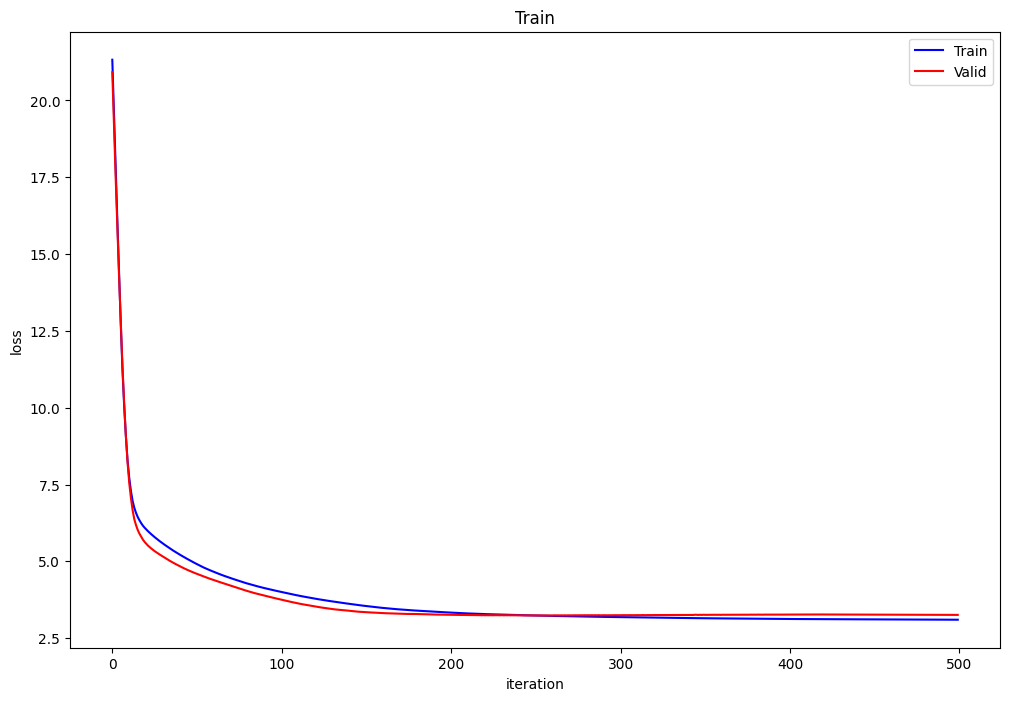

no6
run time = 0.003737211227416992
train loss: 5.460610862452738
valid loss: 4.7832797031721705


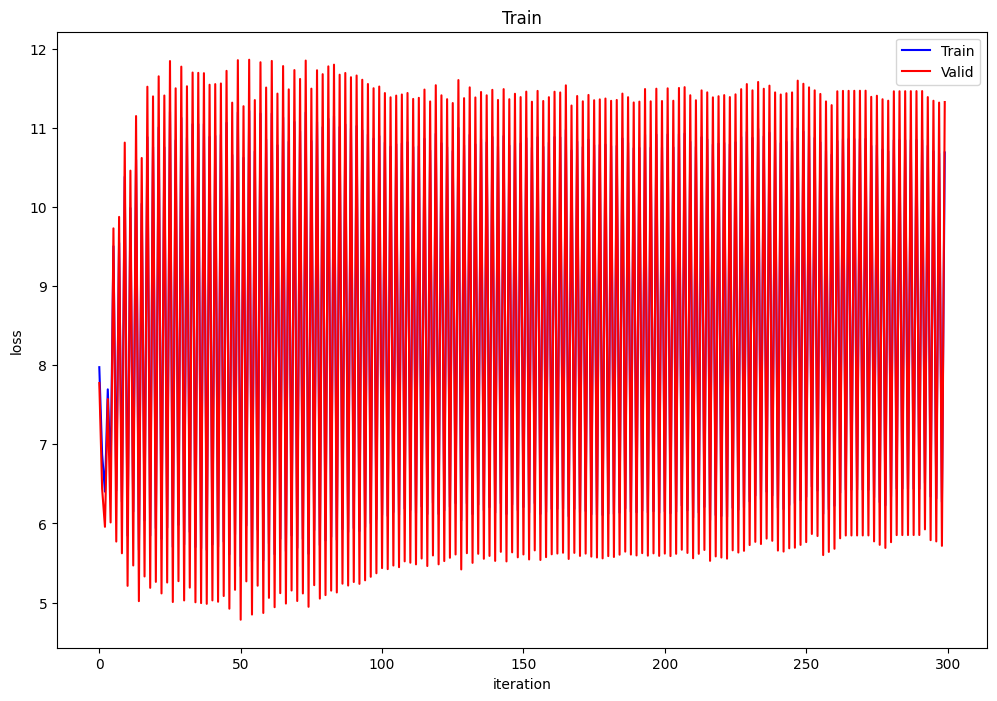

no7
run time = 0.0038962364196777344
train loss: 5.579375459334108
valid loss: 5.08631980213303


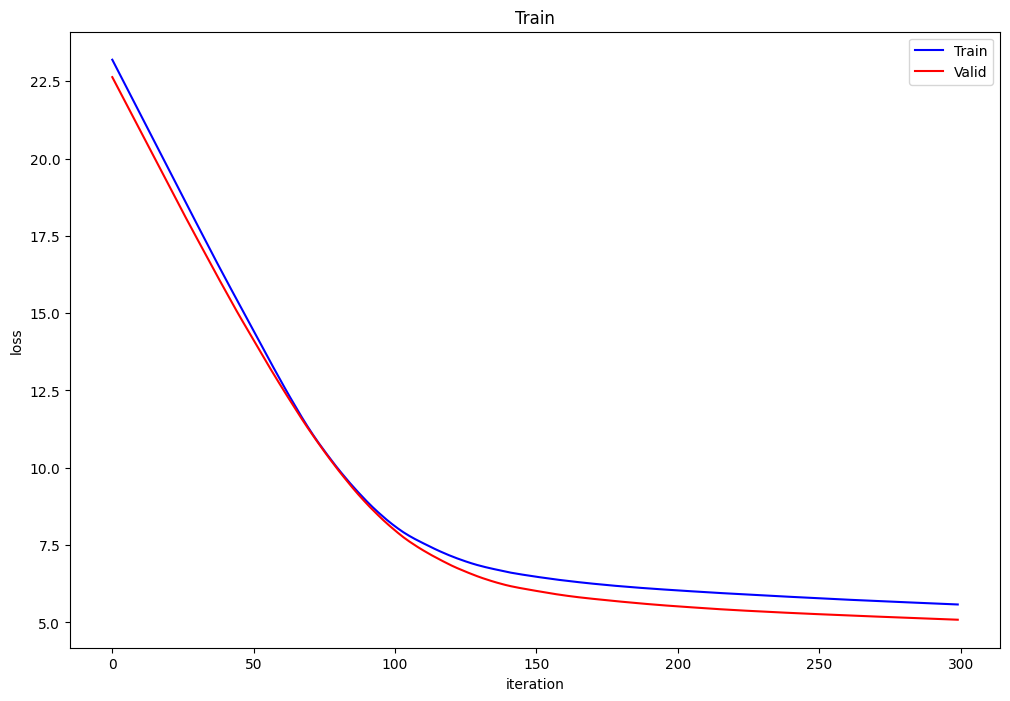

no8
run time = 0.003927707672119141
train loss: 3.207222551577484
valid loss: 3.2632233733290956


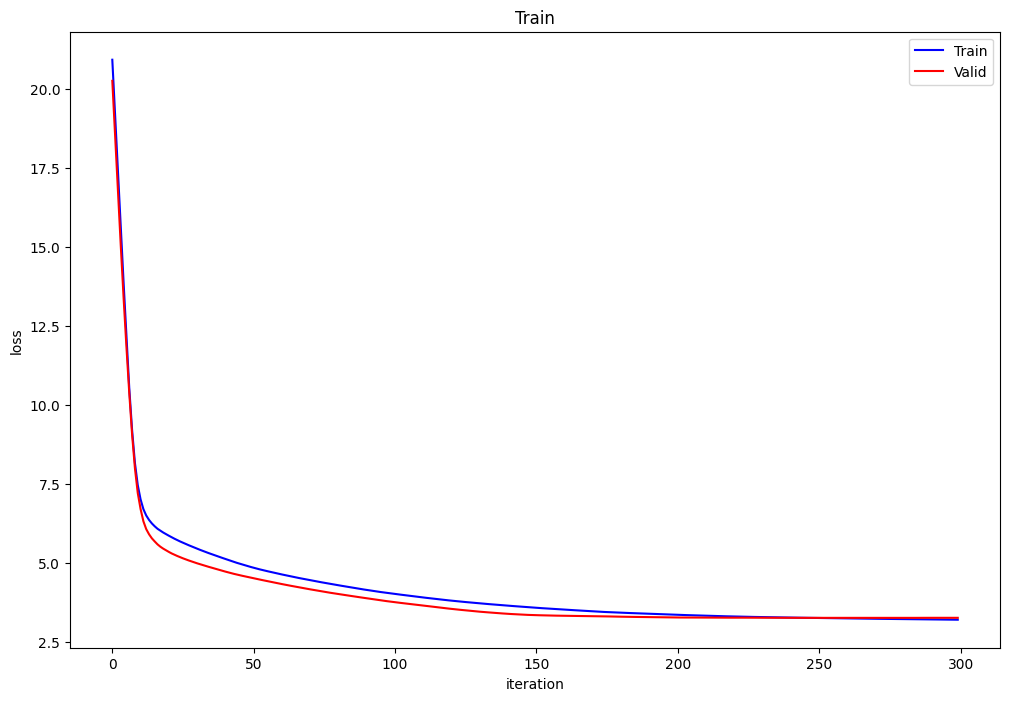

no9
run time = 0.0034749507904052734
train loss: 3.2134690377155684
valid loss: 3.2594126677136854


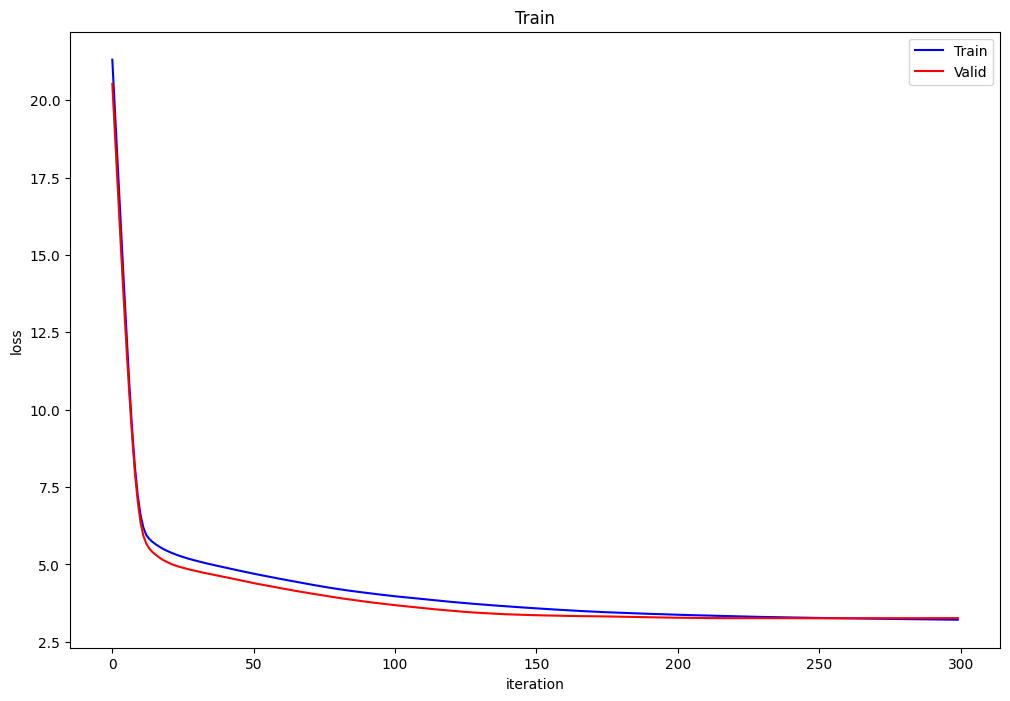

In [8]:
import numpy as np
import pandas as pd
import sklearn.datasets as sd
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
import math
import random
import time

# 读取实验数据
x,y = sd.load_svmlight_file('../data/housing_scale.txt',n_features = 13)

# 分割数据集为训练集和验证集
x_train, x_valid, y_train, y_valid = sms.train_test_split(x, y)

# 将稀疏矩阵转为ndarray类型
x_train = x_train.toarray()
x_valid = x_valid.toarray()
y_train = y_train.reshape(len(y_train),1)
y_valid = y_valid.reshape(len(y_valid),1)#转化为1列

x_train = np.concatenate((np.ones((x_train.shape[0],1)), x_train), axis = 1)
x_valid = np.concatenate((np.ones((x_valid.shape[0],1)), x_valid), axis = 1)

# 均方误差损失函数
def mean_squared_error(X, y, theta):
    hx = X.dot(theta)#w点乘X
    error = np.power((hx - y), 2).mean()
    return error

# 均方误差的梯度函数
def mean_squared_gradient(X, y, theta):
    return X.T.dot(X.dot(theta) - y)

# 平均绝对误差
def mean_absolute_error(X, y, theta):
    hx = X.dot(theta)#w点乘X
    return np.mean(np.abs(hx - y))

# 平均绝对误差的梯度函数
def mean_absolute_gradient(X, y, theta):
    return X.T.dot(np.sign(X.dot(theta) - y))

# 定义梯度下降框架
class Linear_gradient_descent:
    def __init__(self,x_train,x_valid,y_train,y_valid,loss_func,gradient):
        self.x_train = x_train
        self.x_valid = x_valid
        self.y_train = y_train
        self.y_valid = y_valid
        self.loss_func = loss_func
        self.gradient = gradient
        self.theta = 0 # 初始化
        self.loss_train = []
        self.loss_valid = []
        
    # 线性模型参数初始化
    def init_params(self, mode="zero"):
        if mode == "zero": # 零初始化
            self.theta = np.zeros((self.x_train.shape[1],1))
        elif mode == "normal": # 正态分布初始化
            self.theta = np.random.normal(0,1,(self.x_train.shape[1],1))
        elif mode == "random": # 随机初始化
            self.theta = np.random.rand(self.x_train.shape[1],1)
                                  
    #随机梯度下降
    def random_descent(self, alpha, iters):
        n=self.x_train.shape
        self.loss_train = np.zeros((iters,1))
        self.loss_valid = np.zeros((iters,1))
        for i in range(iters):
            #随机选择一个样本
            num=np.random.randint(n,size=1)
            x_select=self.x_train[num,:]
            y_select=self.y_train[num,0]
            grad = self.gradient(x_select, y_select, self.theta)
            self.theta = self.theta - alpha * grad
            self.loss_train[i] = self.loss_func(self.x_train, self.y_train, self.theta)
            self.loss_valid[i] = self.loss_func(self.x_valid, self.y_valid, self.theta)
        return self.theta, self.loss_train, self.loss_valid

    #全梯度下降
    def descent(self, alpha, iters):
        self.loss_train = np.zeros((iters,1))
        self.loss_valid = np.zeros((iters,1))
        for i in range(iters):
            grad = self.gradient(self.x_train, self.y_train, self.theta)
            self.theta = self.theta - alpha * grad
            self.loss_train[i] = self.loss_func(self.x_train, self.y_train, self.theta)
            self.loss_valid[i] = self.loss_func(self.x_valid, self.y_valid, self.theta)
        return self.theta, self.loss_train, self.loss_valid
    
    # 输出最小loss并且画图
    def getLoss_and_plot(self, iters):
        print("train loss: {}".format(self.loss_train.min()))
        print("valid loss: {}".format(self.loss_valid.min()))
        iteration = np.arange(0, iters, step = 1)
        fig, ax = plt.subplots(figsize = (12,8))
        ax.set_title('Train')
        ax.set_xlabel('iteration')
        ax.set_ylabel('loss')
        plt.plot(iteration, self.loss_train, 'b', label='Train')
        plt.plot(iteration, self.loss_valid, 'r', label='Valid')
        plt.legend()
        plt.show()
        
# 不同的损失函数对比实验以及随机梯度下降和全梯度下降的对比实验
        
# 使用均方误差
mean_descent = Linear_gradient_descent(x_train,x_valid,y_train,y_valid,mean_squared_error,mean_squared_gradient)
iters = 300
alpha = 0.001

# 随机梯度下降
print("no1")
mean_descent.init_params(mode = "random")
start_t1 = time.time()
mean_descent.random_descent(alpha,iters)
end_t1 = time.time()
print("run time = {}".format(-start_t1+end_t1))
mean_descent.getLoss_and_plot(iters)

# 全梯度下降
print("no2")
mean_descent.init_params(mode = "random")
start_t2 = time.time()
mean_descent.descent(alpha,iters)
end_t2 = time.time()
print("run time = {}".format(-start_t2+end_t2))
mean_descent.getLoss_and_plot(iters)


# 使用绝对误差
mean_descent = Linear_gradient_descent(x_train,x_valid,y_train,y_valid,mean_absolute_error,mean_absolute_gradient)
iters = 300
alpha = 0.001

# 随机梯度下降
print("no3")
mean_descent.init_params(mode = "random")
start_t3 = time.time()
mean_descent.random_descent(alpha,iters)
end_t3 = time.time()
print("run time = {}".format(-start_t3+end_t3))
mean_descent.getLoss_and_plot(iters)

# 全梯度下降
print("no4")
mean_descent.init_params(mode = "random")
start_t4 = time.time()
mean_descent.descent(alpha,iters)
end_t4 = time.time()
print("run time = {}".format(-start_t4+end_t4))
mean_descent.getLoss_and_plot(iters)

# 不同迭代次数的对比实验
# 全梯度下降
iters = 500
alpha = 0.001
print("no5")
mean_descent.init_params(mode = "random")
start_t2 = time.time()
mean_descent.descent(alpha,iters)
end_t2 = time.time()
print("run time = {}".format(-start_t2+end_t2))
mean_descent.getLoss_and_plot(iters)

# 不同学习率对比实验
iters = 300
alpha = 0.01
print("no6")
mean_descent.init_params(mode = "random")
start_t2 = time.time()
mean_descent.descent(alpha,iters)
end_t2 = time.time()
print("run time = {}".format(-start_t2+end_t2))
mean_descent.getLoss_and_plot(iters)

iters = 300
alpha = 0.0001
print("no7")
mean_descent.init_params(mode = "random")
start_t2 = time.time()
mean_descent.descent(alpha,iters)
end_t2 = time.time()
print("run time = {}".format(-start_t2+end_t2))
mean_descent.getLoss_and_plot(iters)

# 不同参数初始化实验
iters = 300
alpha = 0.001
print("no8")
mean_descent.init_params(mode = "zero")
start_t2 = time.time()
mean_descent.descent(alpha,iters)
end_t2 = time.time()
print("run time = {}".format(-start_t2+end_t2))
mean_descent.getLoss_and_plot(iters)

iters = 300
alpha = 0.001
print("no9")
mean_descent.init_params(mode = "normal")
start_t2 = time.time()
mean_descent.descent(alpha,iters)
end_t2 = time.time()
print("run time = {}".format(-start_t2+end_t2))
mean_descent.getLoss_and_plot(iters)

train loss: 0.021611341505265613
valid loss: 0.02236153204098401


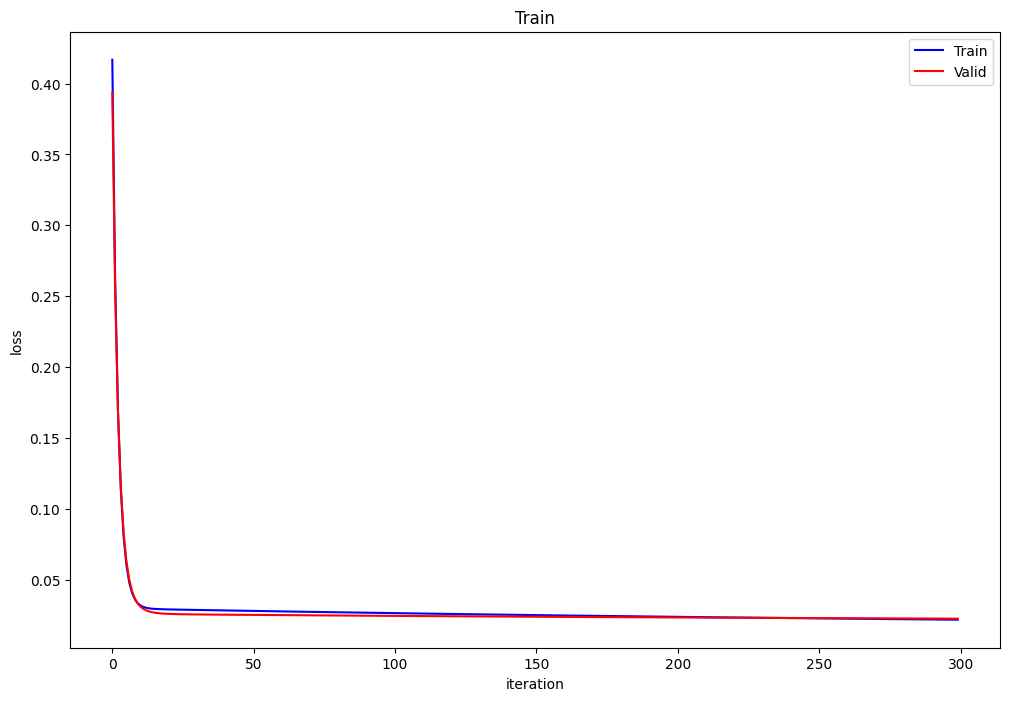

train loss: 0.01828020768411229
valid loss: 0.021875477925675492


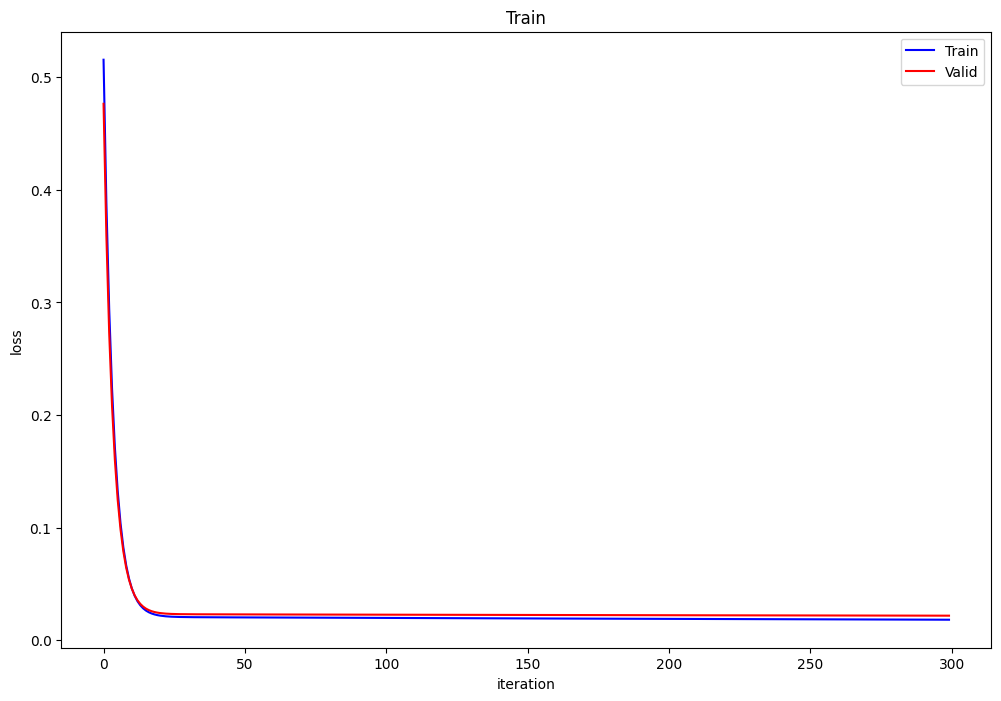

In [7]:
from sklearn.preprocessing import MinMaxScaler
# student grade
# # 选择把缺失的值填充为1
studata_train1=pd.read_csv('../data/TrainSet.csv').fillna(0)
studata_test1=pd.read_csv('../data/TestSet.csv').fillna(0)
# 选择忽略缺失的值
studata_train2=pd.read_csv('../data/TrainSet.csv').dropna()
studata_test2=pd.read_csv('../data/TestSet.csv').dropna()

# 这里实现了数据的归一化
def normalize(train,test):
    scaler=MinMaxScaler(feature_range=(0, 1))
    train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
    test = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)
    return train, test

train1, test1 = normalize(studata_train1, studata_test1)
train2, test2 = normalize(studata_train1, studata_test1)


def data_fit(train,test):
    # 首先排除标签数据把成绩数据提取出来
    x_train=train.drop('Machine learning grade point',axis=1).values
    # 然后单独去取标签数据
    y_train=train['Machine learning grade point'].values
    x_test=test.drop('Machine learning grade point',axis=1).values
    y_test=test['Machine learning grade point'].values

    y_train = y_train.reshape(len(y_train),1)
    y_test = y_test.reshape(len(y_test),1)#转化为1列
    return x_train, x_test, y_train, y_test

train1, test1 = normalize(studata_train1, studata_test1)
train2, test2 = normalize(studata_train2, studata_test2)
x_train1, x_test1, y_train1, y_test1 = data_fit(train1, test1)
x_train2, x_test2, y_train2, y_test2 = data_fit(train2, test2)

# 对比不同的数据处理方式
# nan填充成0
stuScore_descent = Linear_gradient_descent(x_train1,x_test1,y_train1,y_test1,mean_squared_error,mean_squared_gradient)
alpha = 0.0001
iters = 300
stuScore_descent.init_params(mode = "zero")
stuScore_descent.descent(alpha,iters)
stuScore_descent.getLoss_and_plot(iters)

# nan数据直接忽略
stuScore_descent = Linear_gradient_descent(x_train2,x_test2,y_train2,y_test2,mean_squared_error,mean_squared_gradient)
alpha = 0.0001
iters = 300
stuScore_descent.init_params(mode = "zero")
stuScore_descent.descent(alpha,iters)
stuScore_descent.getLoss_and_plot(iters)